<a href="https://colab.research.google.com/github/SachinMhetre678/Machine_Learning/blob/main/Logistic_Regression/PBL(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [5]:
df['target'].unique()

array([0, 1])

In [6]:
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

In [7]:
#check is there any data point missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#Sex = Male : 1 , female = 0
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


<Axes: xlabel='target', ylabel='count'>

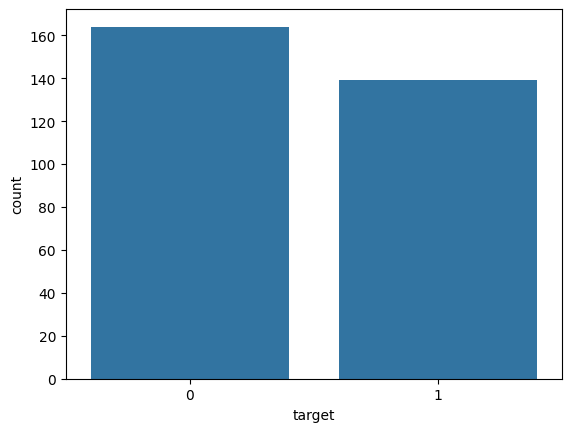

In [10]:
#check is there an inbalance target through bar plot
sns.countplot(x='target',data=df)

In [12]:
#creating a pairplot to display the relationship bet the coloums
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Figure size 960x720 with 0 Axes>

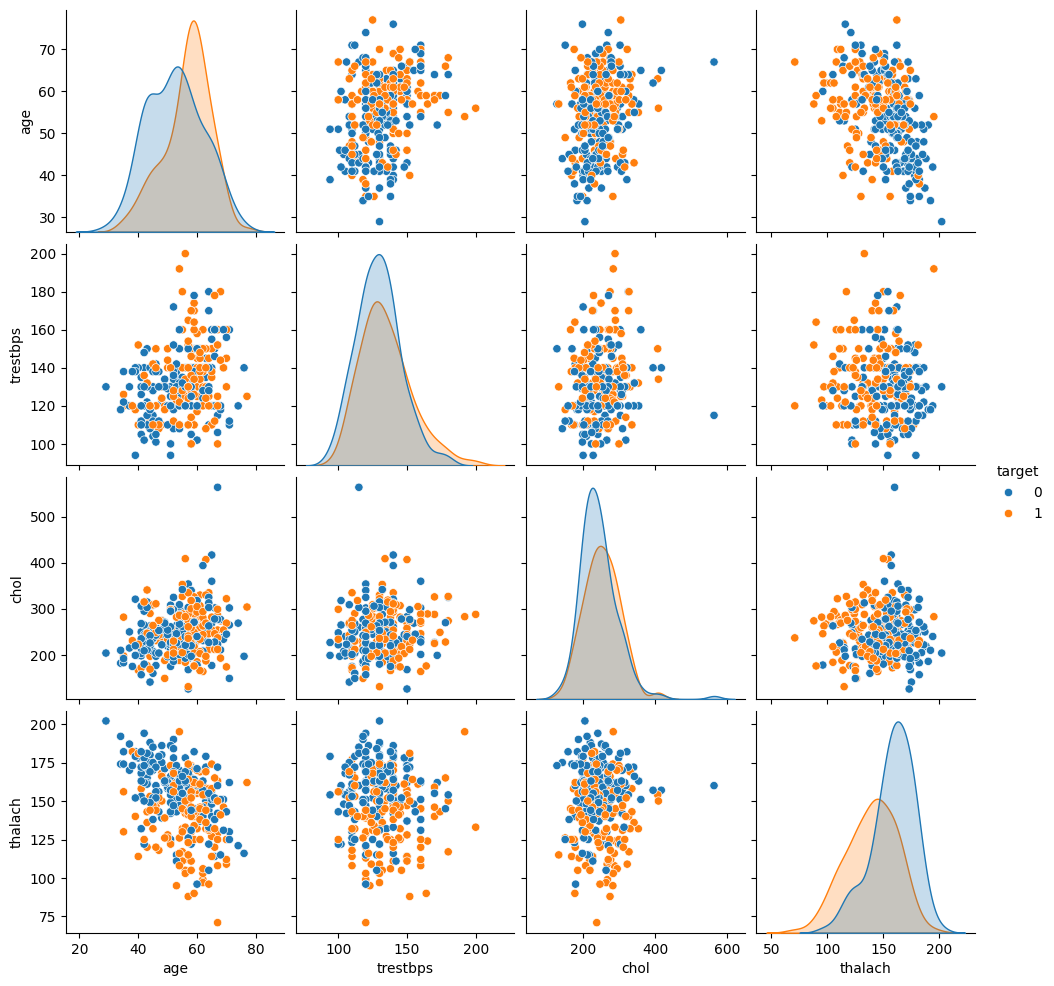

In [18]:
plt.figure(dpi=150)
sns.pairplot(df[['age','trestbps','chol','thalach','target']],hue='target') #huing = what are we intrested in

<Axes: >

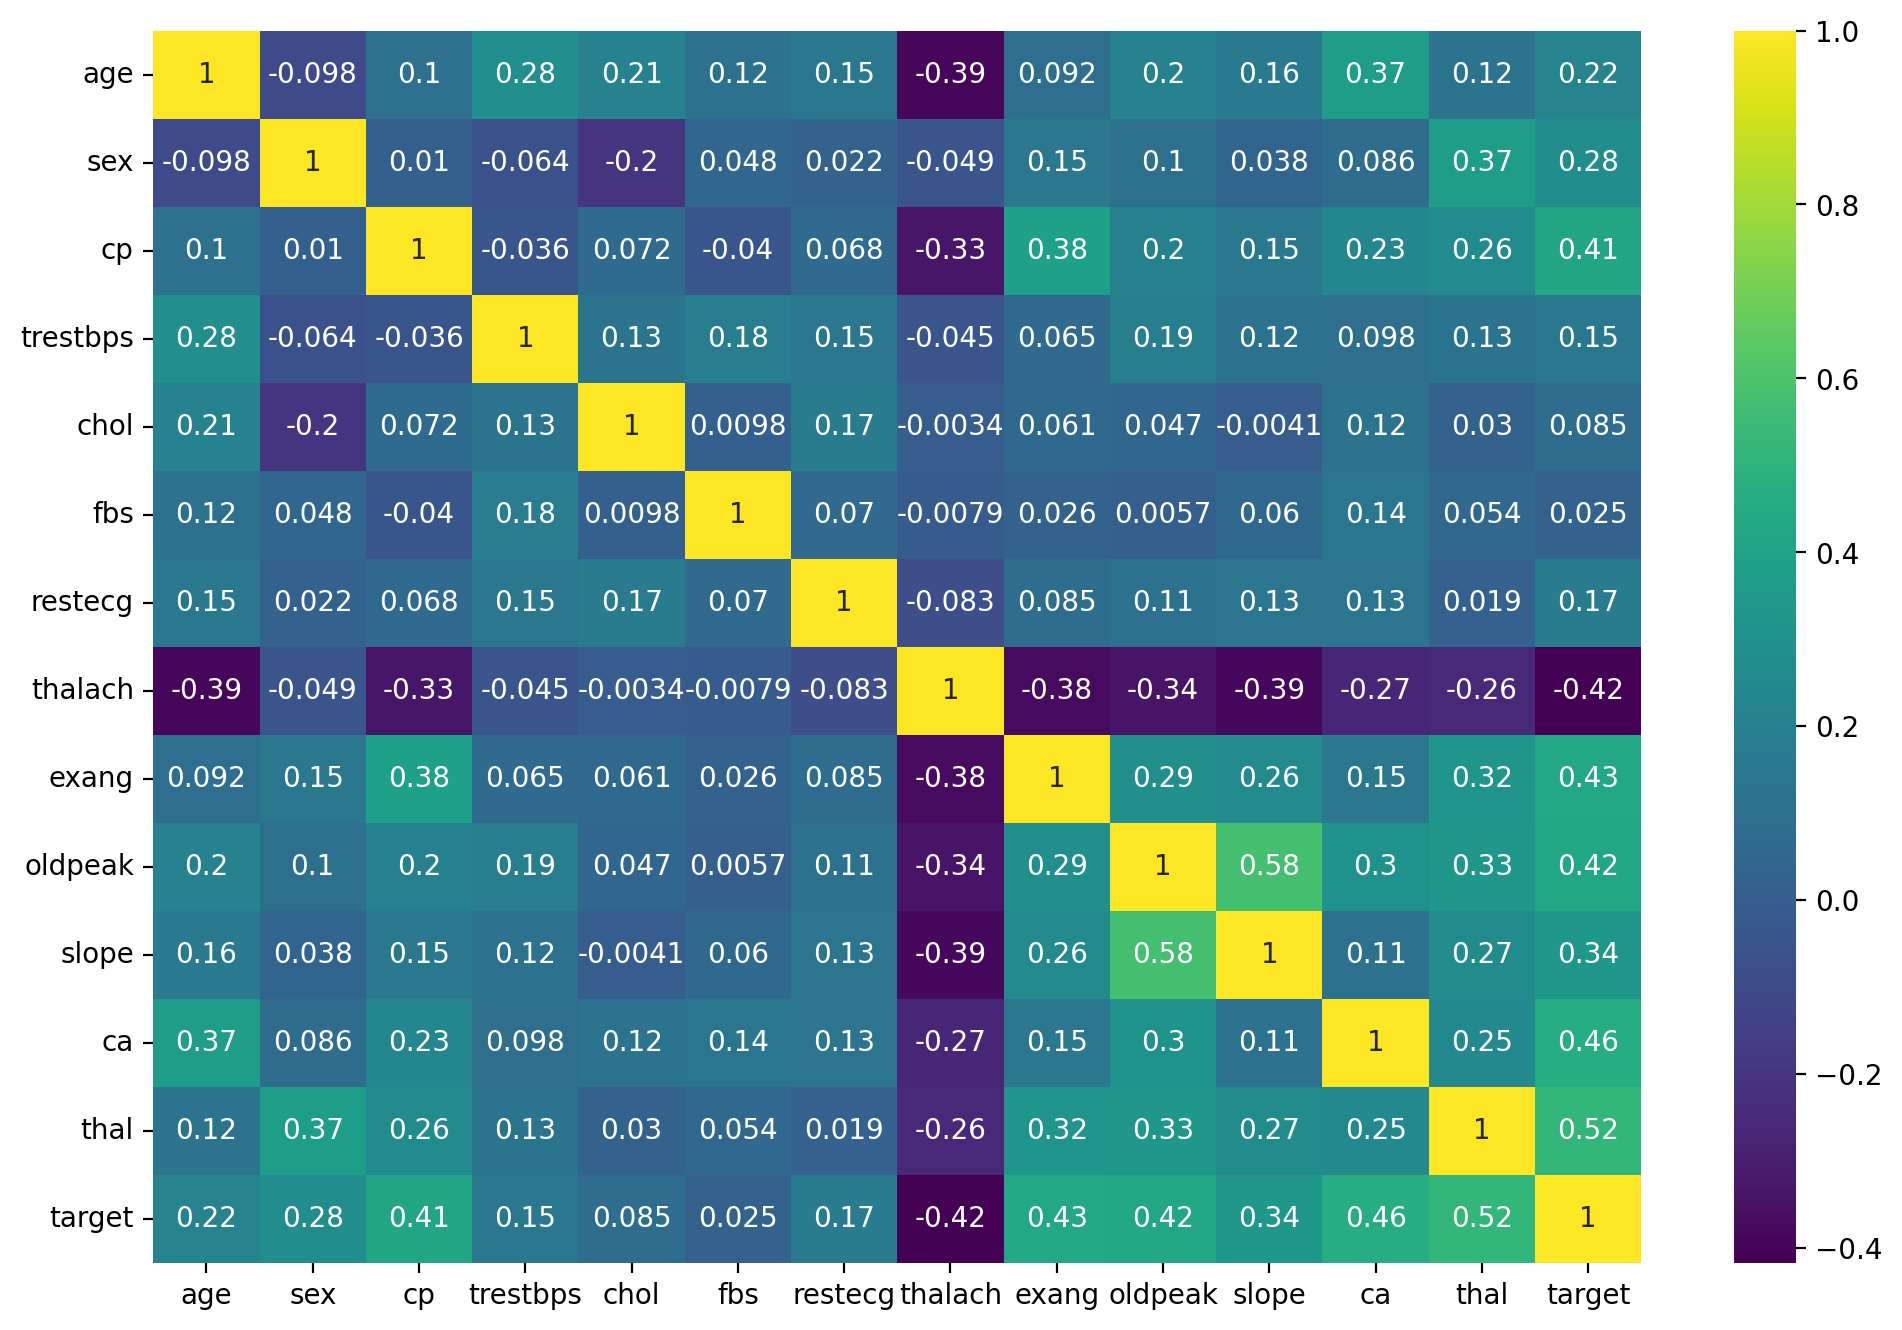

In [21]:
plt.figure(figsize=(12,8),dpi = 200)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [22]:
x = df.drop('target',axis=1)

In [23]:
y = df['target']

In [25]:
#taking test size = 10%
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1,random_state = 101)

In [119]:
scaler = StandardScaler()

In [120]:
scaled_x_train = scaler.fit_transform(x_train)

In [121]:
scaled_x_test = scaler.transform(x_test)

In [105]:
from sklearn.linear_model import LogisticRegressionCV

In [122]:
log_model = LogisticRegressionCV()

In [123]:
log_model.fit(scaled_x_train,y_train)

LogisticRegressionCV()

In [124]:
log_model.C_

array([0.04641589])

In [125]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [126]:
log_model.coef_

array([[ 0.04646266,  0.34766953,  0.39989854,  0.17612886,  0.10197577,
        -0.08195409,  0.16376206, -0.29600279,  0.34626313,  0.28583546,
         0.21058311,  0.57431733,  0.49145689]])

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay,classification_report

In [127]:
y_pred = log_model.predict(scaled_x_test)

In [128]:
confusion_matrix(y_test,y_pred)

array([[1]])

In [129]:
accuracy_score(y_test,y_pred)

1.0

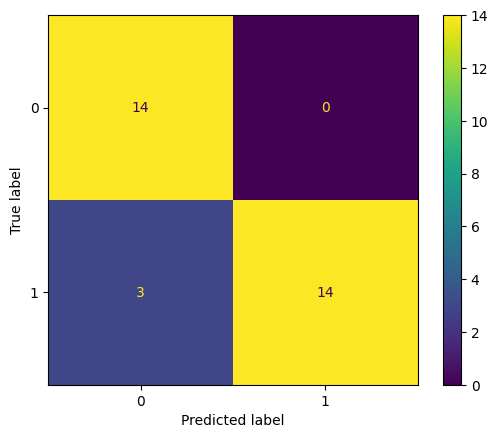

In [116]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.82      0.90        17

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31

